<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [128]:
def unicodetoascii(text):

    TEXT = (text.
    		replace('\\xe2\\x80\\x99', "'").
            replace('\\xc3\\xa9', 'e').
            replace('\\xe2\\x80\\x90', '-').
            replace('\\xe2\\x80\\x91', '-').
            replace('\\xe2\\x80\\x92', '-').
            replace('\\xe2\\x80\\x93', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x98', "'").
            replace('\\xe2\\x80\\x9b', "'").
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9d', '"').
            replace('\\xe2\\x80\\x9e', '"').
            replace('\\xe2\\x80\\x9f', '"').
            replace('\\xe2\\x80\\xa6', '...').
            replace('\\xe2\\x80\\xb2', "'").
            replace('\\xe2\\x80\\xb3', "'").
            replace('\\xe2\\x80\\xb4', "'").
            replace('\\xe2\\x80\\xb5', "'").
            replace('\\xe2\\x80\\xb6', "'").
            replace('\\xe2\\x80\\xb7', "'").
            replace('\\xe2\\x81\\xba', "+").
            replace('\\xe2\\x81\\xbb', "-").
            replace('\\xe2\\x81\\xbc', "=").
            replace('\\xe2\\x81\\xbd', "(").
            replace('\\xe2\\x81\\xbe', ")")

                 )
    return TEXT

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [129]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

df=pd.read_csv('data/job_listings.csv', encoding='utf-8')

def clean_data(column):
    result=[]
    for i in range(len(column)):
        soup=BeautifulSoup(column[i])
        text=soup.text
        text=text.strip('b')
        text=unicodetoascii(text)
        text=text.replace('\\n', '')
        result.append(text)
       # print(text)
    return result

#soup = BeautifulSoup(open("module2-vector-representations/data/job_listings.csv"), 'lxml')
#doc=requests.get('data/job_listings.csv')

##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
                


In [130]:
df['clean_text']=clean_data(df['description'])

In [132]:
df['clean_text'][276]

'"Facebook\'s mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we\'re building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. Whether we\'re creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. Together, we can help people build stronger communities - we\'re just getting started.The Infrastructure Strategy group is responsible for the strategic analysis to support and enable the continued growth critical to Facebook\'s infrastructure organization. The ideal candidate will be passionate about Facebook, have strong analytical and modeling aptitude and has experie

In [133]:
df['description'][276]

'b"<div><div><div>Facebook\'s mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we\'re building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. Whether we\'re creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. Together, we can help people build stronger communities \\xe2\\x80\\x94 we\'re just getting started.\\n</div></div><div>The Infrastructure Strategy group is responsible for the strategic analysis to support and enable the continued growth critical to Facebook\\xe2\\x80\\x99s infrastructure organization. The ideal candidate will be passionate about Faceboo

## 2) Use Spacy to tokenize the listings 

In [104]:
##### Your Code Here #####

import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load('en_core_web_lg')


In [105]:

tokens = []

for doc in tokenizer.pipe(df['clean_text'], batch_size=500):
    
    doc_tokens =[]
    
    for token in doc: 
        if (token.is_stop==False) & (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())
    tokens.append(doc_tokens)
    
df['tokens']=tokens

In [106]:
df['tokens'][0]

['"job',
 'requirements:conceptual',
 'understand',
 'machine',
 'learning',
 'model',
 'like',
 'nai\\xc2\\xa8ve',
 'bayes,',
 'k-means,',
 'svm,',
 'apriori,',
 'linear/',
 'logistic',
 'regression,',
 'neural,',
 'random',
 'forests,',
 'decision',
 'trees,',
 'k-nn',
 'hands-on',
 'experience',
 '2',
 'themintermediate',
 'expert',
 'level',
 'code',
 'skill',
 'python/r.',
 '(ability',
 'write',
 'functions,',
 'clean',
 'efficient',
 'datum',
 'manipulation',
 'mandatory',
 'role)exposure',
 'package',
 'like',
 'numpy,',
 'scipy,',
 'pandas,',
 'matplotlib',
 'etc',
 'python',
 'ggplot2,',
 'dplyr,',
 'tidyr',
 'rability',
 'communicate',
 'model',
 'finding',
 'technical',
 'non-technical',
 'stake',
 'holdershands',
 'experience',
 'sql/hive',
 'similar',
 'programme',
 'languagemust',
 'past',
 'work',
 'github,',
 'kaggle',
 'publish',
 "articlemaster's",
 'degree',
 'statistics/mathematics/computer',
 'science',
 'quant',
 'specific',
 'field.apply',
 'now"']

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [72]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer

#create the transformer -- initialize
vect=CountVectorizer(stop_words='english')

#build vocab and transform text
dtm=vect.fit_transform(df['clean_text'])



In [73]:
dtm=pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [74]:
dtm

,00,000,000pay,02115job,03,0356,04,062,06366,08,...,zenreach,zero,zeus,zf,zheng,zillow,zonesability,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [82]:
table=pd.DataFrame(dtm.sum(axis=0).sort_values(ascending=False).head(30), columns=['count']).reset_index()

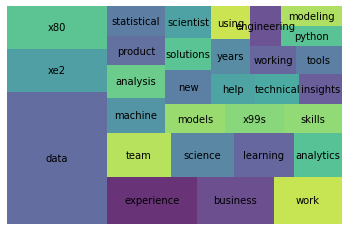

In [84]:
import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=table['count'], label=table['index'], alpha=.8 )
plt.axis('off')
plt.show()


## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

#instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',
                       min_df=2,
                       ngram_range=(1,2),
                        max_features=5000,
                        max_df=0.95
                       )

#Create a vocabularly and get word counts per doc 
dtm=tfidf.fit_transform(df['clean_text'])

#print word count

dtm=pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())


In [108]:
dtm.columns[:100]

Index(['000', '000 employees', '10', '10 years', '100', '100 000',
       '100 countries', '11', '12', '12 months', '15', '17', '18', '19', '20',
       '200', '2015', '2017', '2018', '2019', '24', '25', '30', '3rd',
       '3rd party', '40', '401', '401k', '50', '500', '500 companies', '60',
       '600', '600 cities', '70', '800', '90', 'aa', 'aa employer', 'ab',
       'abilities', 'abilities perspectives', 'ability', 'ability analyze',
       'ability build', 'ability clearly', 'ability communicate',
       'ability develop', 'ability drive', 'ability effectively',
       'ability lead', 'ability manage', 'ability present', 'ability solve',
       'ability translate', 'ability work', 'able', 'able work', 'academic',
       'academics', 'accelerate', 'accelerating', 'accept',
       'accept unsolicited', 'access', 'access compensation', 'accessible',
       'accommodation', 'accommodation disability', 'accommodation let',
       'accommodations', 'accommodations enable', 'accomplish

In [95]:
#Calculate most similar listings 

from sklearn.metrics.pairwise import cosine_similarity 

dist_matrix = cosine_similarity(dtm)

In [100]:
data=pd.DataFrame(dist_matrix)

In [101]:
data[data[0]<1][0].sort_values(ascending=False)[:10]

115    0.178640
338    0.172953
403    0.149760
393    0.144232
199    0.141137
366    0.140226
222    0.136826
276    0.129855
60     0.122875
42     0.122444
Name: 0, dtype: float64

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [113]:
text=["""Excellent educational background in computer science, machine learning, statistics, applied math, economics, operations research, or a related field. PhD degree preferred, Masters required.
At least 5 years of industry experience in data science, with significant personal experience as a technical contributor. Experience working with large data sets and experience with spatial data a plus.
Experience as a frontline manager, leading teams of 3 or more. As a manager, you will manage several direct reports initially and will have the opportunity to create, scale and nourish a team of experienced professionals.
Entrepreneurial mindset. Everywhere you go, you can't help but mobilize people, create things, solve problems, roll up your sleeves, collaborate, go above and beyond. You are an insatiable doer and motivator of others.
Experience working in a metrics and experimentation driven organization.
Experience with common analysis tools - Python, R, and SQL. Demonstrable familiarity with code and programming concepts.
A never-ending desire to grow and learn."""]

In [110]:
from sklearn.neighbors import NearestNeighbors

#Fit on DTM

nn=NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [111]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.2816864 , 1.28611617, 1.3040246 , 1.30825658]]),
 array([[  0, 115, 338, 403, 393]]))

In [114]:
new=tfidf.transform(text)

In [115]:
nn.kneighbors(new.todense())

(array([[1.29243869, 1.3039475 , 1.30467338, 1.30467338, 1.30498859]]),
 array([[220, 276,  10,  43,  38]]))

In [117]:
df['clean_text'][276]

'"Facebook\'s mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we\'re building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. Whether we\'re creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. Together, we can help people build stronger communities \\xe2\\x80\\x94 we\'re just getting started.The Infrastructure Strategy group is responsible for the strategic analysis to support and enable the continued growth critical to Facebook\\xe2\\x80\\x99s infrastructure organization. The ideal candidate will be passionate about Facebook, have strong analytical and modeli

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 